In [8]:
# Import packages
import sys 
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from statsmodels.tsa.seasonal import STL
import numpy as np
from sklearn.linear_model import LinearRegression
import datetime as dt
from matplotlib.colors import TwoSlopeNorm
import time
from rasterstats import zonal_stats
from scipy.stats import pearsonr
import plotly.express as px
import rasterio.mask
from osgeo import gdal
import re

sys.path.append(os.path.abspath("C:/Users/mieke/Documents/Msc Thesis/GitHub repositories/dicra/analytics/sandbox/notebooks/crop_yield_prediction/process_and_dppd"))
import functions_time_series #import python file containing the functions
import functions_preprocessing #import python file containing the functions

In [9]:
# For updates
import importlib
importlib.reload(functions_time_series)
importlib.reload(functions_preprocessing)

<module 'functions_preprocessing_adjust' from 'C:\\Users\\mieke\\Documents\\Msc Thesis\\Notebooks Python\\Others\\functions_preprocessing_adjust.py'>

In [10]:
# Import district boundaries
district_bounds = gpd.read_file('C:/Users/mieke/Documents/Msc Thesis/GitHub repositories/dicra/src/data_preprocessing/tsdm/District_Boundary.shp')
district_bounds = district_bounds.reset_index()
# Import mandal boundaries
mandal_bounds = gpd.read_file('C:/Users/mieke/Documents/Msc Thesis/GitHub repositories/dicra/src/data_preprocessing/tsdm/Mandal_Boundary.shp')
mandal_bounds = mandal_bounds.reset_index()

In [11]:
LAI_df_district = pd.read_excel('C:/Users/mieke/Documents/Data_download/Copernicus/LAI/Telangana/LAI_df_district.xlsx')
SSM_df_district = pd.read_excel('C:/Users/mieke/Documents/Data_download/GEE/SSM/Telangana/SSM_df_district.xlsx')
SUSM_df_district = pd.read_excel('C:/Users/mieke/Documents/Data_download/GEE/SUSM/Telangana/SUSM_df_district.xlsx')
NDVI_df_district = pd.read_excel('C:/Users/mieke/Documents/Data_download/GEE/NDVI/Telangana/NDVI_df_district.xlsx')
LST_df_district = pd.read_excel('C:/Users/mieke/Documents/Data_download/GEE/LST/Telangana/LST_df_district.xlsx')

In [12]:
LAI_df_mandal = pd.read_excel('C:/Users/mieke/Documents/Data_download/Copernicus/LAI/Telangana/LAI_df_mandal.xlsx')
SSM_df_mandal = pd.read_excel('C:/Users/mieke/Documents/Data_download/GEE/SSM/Telangana/SSM_df_mandal.xlsx')
SUSM_df_mandal = pd.read_excel('C:/Users/mieke/Documents/Data_download/GEE/SUSM/Telangana/SUSM_df_mandal.xlsx')
NDVI_df_mandal = pd.read_excel('C:/Users/mieke/Documents/Data_download/GEE/NDVI/Telangana/NDVI_df_mandal.xlsx')
#LST_df_mandal = pd.read_excel('C:/Users/mieke/Documents/Data_download/GEE/LST/Telangana/LST_df_mandal.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/mieke/Documents/Data_download/GEE/NDVI/Telangana/NDVI_df_mandal.xlsx'

## DISTRICT

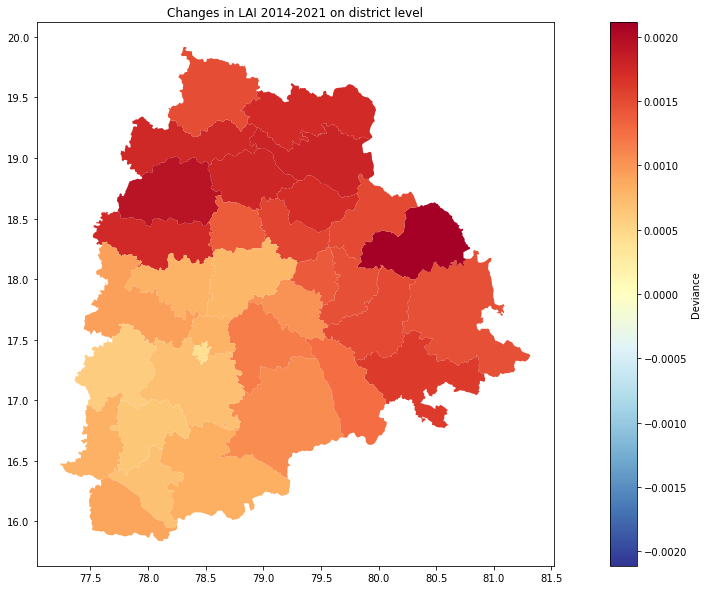

In [ ]:
# DISTRICT
seasonal_comp = 7
images_per_cycle = round(3*12)
# Run the dppd function to derive a positive deviance analysis plot
# NOTE: In order to decide upon seasonal=7, we use the code in the previous cell
score_LAI_district = functions_time_series.dppd_function(LAI_df_district, 'Telangana', 2016, 2021, 'LAI', district_bounds, 'district', images_per_cycle, seasonal_comp)
# Checks if we do not have any NaN values anymore: LST_df_district[LST_df_district.isna().any(axis=1)]

In [ ]:
base_district = gpd.read_file(r'C:\Users\mieke\Documents\Msc Thesis\GitHub repositories\dicra\src\data_preprocessing\base_geojson\TS_district_boundary.json')
#base_district['centroid'] = base_district['geometry'].centroid
base_district['DPPD score'] = score_LAI_district 
base_district.to_file(r'C:\Users\mieke\Documents\Data_analysis\Telangana\LAI\Output\LAI_dppd_district_temp.geojson', driver="GeoJSON")

print(base_district.crs)
print(len(base_district))
print(len(score_LAI_district))

epsg:4326
33
33


In [ ]:
# print(base_district[base_district['DPPD score'] == max(base_district['DPPD score'])])
# print(base_district[base_district['DPPD score'] == min(base_district['DPPD score'])])

          Area Dist_Name    uid  \
3  4189.022904    Mulugu  TDID4   

                                            geometry  DPPD score  
3  POLYGON ((79.84389 18.15964, 79.85469 18.14713...    0.002113  
          Area  Dist_Name     uid  \
29  182.638047  Hyderabad  TDID30   

                                             geometry  DPPD score  
29  POLYGON ((78.51558 17.37731, 78.51622 17.38332...     0.00042  


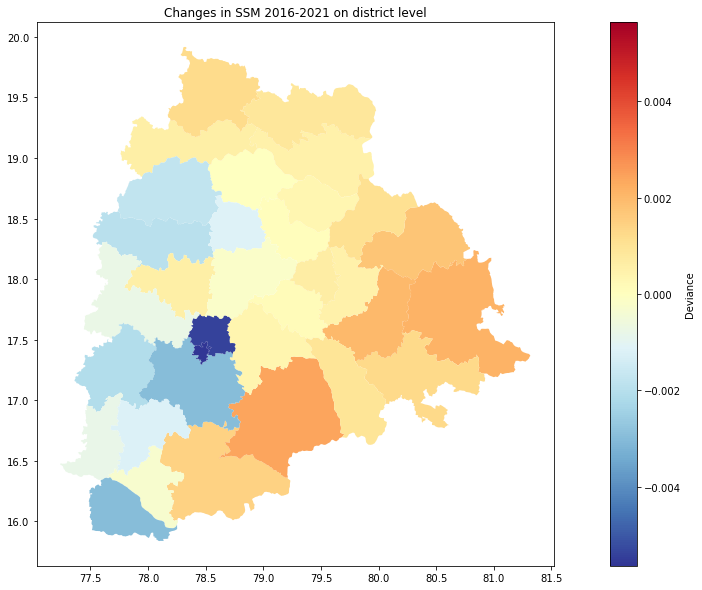

In [ ]:
# DISTRICT
seasonal_comp = 7
images_per_cycle = round(365/3)
# Run the dppd function to derive a positive deviance analysis plot
# NOTE: In order to decide upon seasonal=7, we use the code in the previous cell
score_SSM_district = functions_time_series.dppd_function(SSM_df_district, 'Telangana', 2016, 2021, 'SSM', district_bounds, 'district', images_per_cycle, seasonal_comp)
# Checks if we do not have any NaN values anymore: LST_df_district[LST_df_district.isna().any(axis=1)]

In [ ]:
base_district = gpd.read_file(r'C:\Users\mieke\Documents\Msc Thesis\GitHub repositories\dicra\src\data_preprocessing\base_geojson\TS_district_boundary.json')
#base_district['centroid'] = base_district['geometry'].centroid
base_district['DPPD score'] = score_SSM_district 
base_district.to_file(r'C:\Users\mieke\Documents\Data_analysis\Telangana\SSM\Output\SSM_dppd_district_temp.geojson', driver="GeoJSON")

print(base_district.crs)
print(len(base_district))
print(len(score_SSM_district))

In [ ]:
# DISTRICT
seasonal_comp = 7
images_per_cycle = round(365/3)
# Run the dppd function to derive a positive deviance analysis plot
# NOTE: In order to decide upon seasonal=7, we use the code in the previous cell
score_SUSM_district = functions_time_series.dppd_function(SUSM_df_district, 'Telangana', 2016, 2021, 'SUSM', district_bounds, 'district', images_per_cycle, seasonal_comp)
# Checks if we do not have any NaN values anymore: LST_df_district[LST_df_district.isna().any(axis=1)]

In [ ]:
base_district = gpd.read_file(r'C:\Users\mieke\Documents\Msc Thesis\GitHub repositories\dicra\src\data_preprocessing\base_geojson\TS_district_boundary.json')
#base_district['centroid'] = base_district['geometry'].centroid
base_district['DPPD score'] = score_SUSM_district 
base_district.to_file(r'C:\Users\mieke\Documents\Data_analysis\Telangana\SUSM\Output\SUSM_dppd_district_temp.geojson', driver="GeoJSON")

print(base_district.crs)
print(len(base_district))
print(len(score_SUSM_district))

In [ ]:
# DISTRICT
seasonal_comp = 7
images_per_cycle = round(365/16)
# Run the dppd function to derive a positive deviance analysis plot
# NOTE: In order to decide upon seasonal=7, we use the code in the previous cell
score_NDVI_district = functions_time_series.dppd_function(NDVI_df_district, 'Telangana', 2016, 2021, 'NDVI', district_bounds, 'district', images_per_cycle, seasonal_comp)
# Checks if we do not have any NaN values anymore: LST_df_district[LST_df_district.isna().any(axis=1)]

In [ ]:
base_district = gpd.read_file(r'C:\Users\mieke\Documents\Msc Thesis\GitHub repositories\dicra\src\data_preprocessing\base_geojson\TS_district_boundary.json')
#base_district['centroid'] = base_district['geometry'].centroid
base_district['DPPD score'] = score_NDVI_district 
base_district.to_file(r'C:\Users\mieke\Documents\Data_analysis\Telangana\NDVI\Output\NDVI_dppd_district_temp.geojson', driver="GeoJSON")

print(base_district.crs)
print(len(base_district))
print(len(score_NDVI_district))

In [ ]:
# DISTRICT
seasonal_comp = 7
images_per_cycle = round(365/1)
# Run the dppd function to derive a positive deviance analysis plot
# NOTE: In order to decide upon seasonal=7, we use the code in the previous cell
score_LST_district = functions_time_series.dppd_function(LST_df_district, 'Telangana', 2016, 2021, 'LST', district_bounds, 'district', images_per_cycle, seasonal_comp)
# Checks if we do not have any NaN values anymore: LST_df_district[LST_df_district.isna().any(axis=1)]

In [ ]:
base_district = gpd.read_file(r'C:\Users\mieke\Documents\Msc Thesis\GitHub repositories\dicra\src\data_preprocessing\base_geojson\TS_district_boundary.json')
#base_district['centroid'] = base_district['geometry'].centroid
base_district['DPPD score'] = score_LST_district 
base_district.to_file(r'C:\Users\mieke\Documents\Data_analysis\Telangana\LST\Output\LST_dppd_district_temp.geojson', driver="GeoJSON")

print(base_district.crs)
print(len(base_district))
print(len(score_LST_district))

## MANDAL

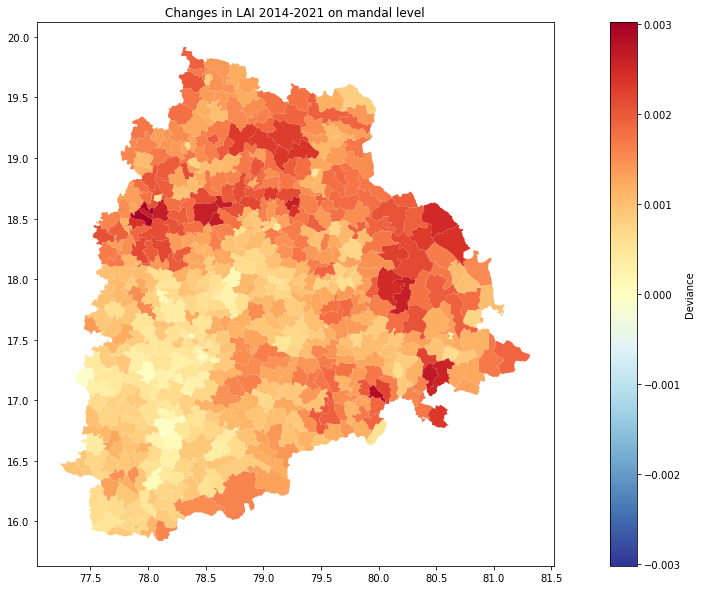

In [ ]:
# MANDAL
seasonal_comp = 7
images_per_cycle = round(3*12)
# Run the dppd function to derive a positive deviance analysis plot
# NOTE: In order to decide upon seasonal=7, we use the code in the previous cell
score_LAI_mandal = functions_time_series.dppd_function(LAI_df_mandal, 'Telangana', 2016, 2021, 'LAI', mandal_bounds, 'mandal', images_per_cycle, seasonal_comp)
# Checks if we do not have any NaN values anymore: LST_df_district[LST_df_district.isna().any(axis=1)]

In [ ]:
base_mandal = gpd.read_file(r'C:\Users\mieke\Documents\Msc Thesis\GitHub repositories\dicra\src\data_preprocessing\base_geojson\TS_mandal_boundary.json')
#base_mandal['centroid'] = base_mandal['geometry'].centroid
base_mandal['DPPD score'] = score_LAI_mandal 
base_mandal.to_file(r'C:\Users\mieke\Documents\Data_analysis\Telangana\LAI\Output\LAI_dppd_mandal_temp.geojson', driver="GeoJSON")

print(base_mandal.crs)
print(len(base_mandal))
print(len(score_LAI_mandal))

epsg:4326
592
592


In [ ]:
# print(base_mandal[base_mandal['DPPD score'] == min(base_mandal['DPPD score'])])
# print(base_mandal[base_mandal['DPPD score'] == max(base_mandal['DPPD score'])])

    Shape_Leng    Shape_Area   Mandal_Nam  Dist_Name N_Revenue     uid  \
45    0.733813  20703.866517  Basheerabad  Vikarabad    Tandur  TMID46   

                                             geometry  DPPD score  
45  POLYGON ((77.44886 17.27189, 77.42491 17.25745...   -0.000096  
     Shape_Leng    Shape_Area Mandal_Nam  Dist_Name N_Revenue      uid  \
525    0.843323  13370.730054      Varni  Nizamabad    Bodhan  TMID526   

                                              geometry  DPPD score  
525  POLYGON ((77.91842 18.57351, 77.90866 18.57495...    0.003016  


In [ ]:
# MANDAL
seasonal_comp = 7
images_per_cycle = round(365/3)
# Run the dppd function to derive a positive deviance analysis plot
# NOTE: In order to decide upon seasonal=7, we use the code in the previous cell
score_SSM_mandal = functions_time_series.dppd_function(SSM_df_mandal, 'Telangana', 2016, 2021, 'SSM', mandal_bounds, 'mandal', images_per_cycle, seasonal_comp)
# Checks if we do not have any NaN values anymore: LST_df_district[LST_df_district.isna().any(axis=1)]

In [ ]:
base_mandal = gpd.read_file(r'C:\Users\mieke\Documents\Msc Thesis\GitHub repositories\dicra\src\data_preprocessing\base_geojson\TS_mandal_boundary.json')
#base_mandal['centroid'] = base_mandal['geometry'].centroid
base_mandal['DPPD score'] = score_SSM_mandal 
base_mandal.to_file(r'C:\Users\mieke\Documents\Data_analysis\Telangana\SSM\Output\SSM_dppd_mandal_temp.geojson', driver="GeoJSON")

print(base_mandal.crs)
print(len(base_mandal))
print(len(score_SSM_mandal))

In [ ]:
# MANDAL
seasonal_comp = 7
images_per_cycle = round(365/3)
# Run the dppd function to derive a positive deviance analysis plot
# NOTE: In order to decide upon seasonal=7, we use the code in the previous cell
score_SUSM_mandal = functions_time_series.dppd_function(SUSM_df_mandal, 'Telangana', 2016, 2021, 'SUSM', mandal_bounds, 'mandal', images_per_cycle, seasonal_comp)
# Checks if we do not have any NaN values anymore: LST_df_district[LST_df_district.isna().any(axis=1)]

In [ ]:
base_mandal = gpd.read_file(r'C:\Users\mieke\Documents\Msc Thesis\GitHub repositories\dicra\src\data_preprocessing\base_geojson\TS_mandal_boundary.json')
#base_mandal['centroid'] = base_mandal['geometry'].centroid
base_mandal['DPPD score'] = score_SUSM_mandal 
base_mandal.to_file(r'C:\Users\mieke\Documents\Data_analysis\Telangana\SUSM\Output\SUSM_dppd_mandal_temp.geojson', driver="GeoJSON")

print(base_mandal.crs)
print(len(base_mandal))
print(len(score_SUSM_mandal))

In [ ]:
# MANDAL
seasonal_comp = 7
images_per_cycle = round(365/16)
# Run the dppd function to derive a positive deviance analysis plot
# NOTE: In order to decide upon seasonal=7, we use the code in the previous cell
score_NDVI_mandal = functions_time_series.dppd_function(NDVI_df_mandal, 'Telangana', 2016, 2021, 'NDVI', mandal_bounds, 'mandal', images_per_cycle, seasonal_comp)
# Checks if we do not have any NaN values anymore: LST_df_district[LST_df_district.isna().any(axis=1)]

In [ ]:
base_mandal = gpd.read_file(r'C:\Users\mieke\Documents\Msc Thesis\GitHub repositories\dicra\src\data_preprocessing\base_geojson\TS_mandal_boundary.json')
#base_mandal['centroid'] = base_mandal['geometry'].centroid
base_mandal['DPPD score'] = score_NDVI_mandal 
base_mandal.to_file(r'C:\Users\mieke\Documents\Data_analysis\Telangana\NDVI\Output\NDVI_dppd_mandal_temp.geojson', driver="GeoJSON")

print(base_mandal.crs)
print(len(base_mandal))
print(len(score_NDVI_mandal))

In [ ]:
# # MANDAL
# seasonal_comp = 7
# images_per_cycle = round(365/1)
# # Run the dppd function to derive a positive deviance analysis plot
# # NOTE: In order to decide upon seasonal=7, we use the code in the previous cell
# score_LST_mandal = functions_time_series.dppd_function(LST_df_mandal, 'Telangana', 2016, 2021, 'LST', mandal_bounds, 'mandal', images_per_cycle, seasonal_comp)
# # Checks if we do not have any NaN values anymore: LST_df_district[LST_df_district.isna().any(axis=1)]

In [ ]:
# base_mandal = gpd.read_file(r'C:\Users\mieke\Documents\Msc Thesis\GitHub repositories\dicra\src\data_preprocessing\base_geojson\TS_mandal_boundary.json')
# base_mandal['centroid'] = base_mandal['geometry'].centroid
# base_mandal['DPPD score'] = score_LST_mandal 
# base_mandal.to_file(r'C:\Users\mieke\Documents\Data_analysis\Telangana\LST\Output\LST_dppd_mandal.geojson', driver="GeoJSON")

# print(base_mandal.crs)
# print(len(base_mandal))
# print(len(score_LST_mandal))

## Here you can print a parameter to check which values for seasonal and period are suitable

In [ ]:
# base_mandal[base_mandal['DPPD score'] < 0]

,Shape_Leng,Shape_Area,Mandal_Nam,Dist_Name,N_Revenue,uid,geometry,DPPD score
34,0.167967,1792.194923,Bachupally,Medchal_Malkajgiri,Malkajgiri,TMID35,"POLYGON ((78.39477 17.54186, 78.37710 17.55371...",-0.000092
35,0.253528,1640.014227,Bahadurpura,Hyderabad,HYDERABAD,TMID36,"POLYGON ((78.45809 17.36457, 78.45112 17.35981...",-0.000054
45,0.733813,20703.866517,Basheerabad,Vikarabad,Tandur,TMID46,"POLYGON ((77.44886 17.27189, 77.42491 17.25745...",-0.000096
185,1.029678,29435.810523,Jadcherla,Mahabubnagar,Mahabubnagar,TMID186,"POLYGON ((78.32295 16.82553, 78.32617 16.84825...",-0.000057


In [ ]:
# mandal_bounds[mandal_bounds['Mandal_Nam'] == 'Basheerabad']


,index,Area,S_No,No_HH,TOT_P,TOT_M,TOT_F,P_06,M_06,F_06,...,F_SC,P_ST,M_ST,F_ST,Shape_Leng,Shape_Area,Mandal_Nam,Dist_Name,N_Revenue,geometry
45,45,204.0,515.0,8800.0,43562.0,21603.0,21959.0,5424.0,2798.0,2626.0,...,3579.0,7986.0,4027.0,3959.0,0.733813,20703.866517,Basheerabad,Vikarabad,Tandur,"POLYGON ((77.44574 17.27205, 77.44754 17.27189..."


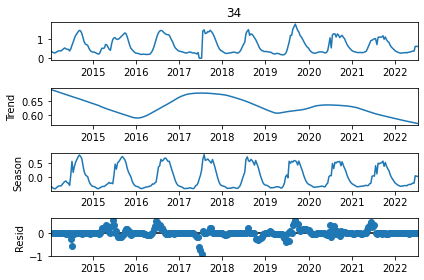

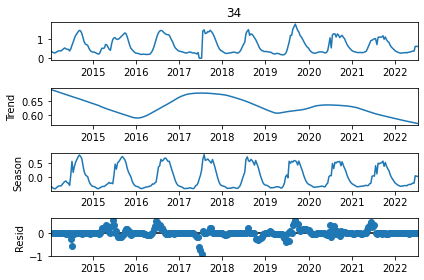

In [ ]:
# # This cell selects one datapoint to give more insight on what the trend looks like and which values we should assign to the period and season attribute
# #for i in range(20):#np.size(LAI_df_mandal, axis=1)-2):
# index =  34 # select a polygon
# seasonal_comp = 7
# temp_per = round(3*12)

# df_selected = LAI_df_mandal[['Calendar Date', index]]
# df_selected = df_selected.sort_values(by=['Calendar Date'])
# df_selected.index = df_selected['Calendar Date']

# X = df_selected[index]

# # Decompose using STL Seasonal-Trend Decomposition using LOESS
# stl = STL(X, period = temp_per, seasonal=seasonal_comp, robust=True)
# res = stl.fit()
# res.plot()

In [ ]:
# This cell shows the DPPD for LST on district level over 2016-2019 to illustrate the effects of COVID
seasonal_comp = 3
images_per_cycle = round(365/1)
# Run the dppd function to derive a positive deviance analysis plot
# NOTE: In order to decide upon seasonal=7, we use the code in the previous cell
score_LST_district = functions_time_series.dppd_function(LST_df_district, 'Telangana', 2016, 2019, 'LST', district_bounds, 'district', images_per_cycle, seasonal_comp)
# Checks if we do not have any NaN values anymore: LST_df_district[LST_df_district.isna().any(axis=1)]

## Below, we change the Trend scores to monthly slopes such that they become comparable

In [ ]:
# Import DPPD files
district_LAI = gpd.read_file(r'C:\Users\mieke\Documents\Data_analysis\Telangana\LAI\Output\LAI_dppd_district_temp.geojson')
district_NDVI = gpd.read_file(r'C:\Users\mieke\Documents\Data_analysis\Telangana\NDVI\Output\NDVI_dppd_district_temp.geojson')
district_SSM = gpd.read_file(r'C:\Users\mieke\Documents\Data_analysis\Telangana\SSM\Output\SSM_dppd_district_temp.geojson')
district_SUSM = gpd.read_file(r'C:\Users\mieke\Documents\Data_analysis\Telangana\SUSM\Output\SUSM_dppd_district_temp.geojson')

mandal_LAI = gpd.read_file(r'C:\Users\mieke\Documents\Data_analysis\Telangana\LAI\Output\LAI_dppd_mandal_temp.geojson')
mandal_NDVI = gpd.read_file(r'C:\Users\mieke\Documents\Data_analysis\Telangana\NDVI\Output\NDVI_dppd_mandal_temp.geojson')
mandal_SSM = gpd.read_file(r'C:\Users\mieke\Documents\Data_analysis\Telangana\SSM\Output\SSM_dppd_mandal_temp.geojson')
mandal_SUSM = gpd.read_file(r'C:\Users\mieke\Documents\Data_analysis\Telangana\SUSM\Output\SUSM_dppd_mandal_temp.geojson')

num = 31 # The number of days within a month

In [ ]:
# LAI uses data on a 10-daily base
district_LAI['DPPD score'] = num/10 * district_LAI['DPPD score']
mandal_LAI['DPPD score'] = num/10 * mandal_LAI['DPPD score']
# NDVI uses data on a 16-daily base
district_NDVI['DPPD score'] = num/16 * district_NDVI['DPPD score']
mandal_NDVI['DPPD score'] = num/16 * mandal_NDVI['DPPD score']
# SSM uses data on a 3-daily base
district_SSM['DPPD score'] = num/3 * district_SSM['DPPD score']
mandal_SSM['DPPD score'] = num/3 * mandal_SSM['DPPD score']
# SUSM uses data on a 3-daily base
district_SUSM['DPPD score'] = num/3 * district_SUSM['DPPD score']
mandal_SUSM['DPPD score'] = num/3 * mandal_SUSM['DPPD score']

In [ ]:
# Save the DPPD scores on a monthly base to the files to be published on DiCRA
district_LAI.to_file(r'C:\Users\mieke\Documents\Data_analysis\Telangana\LAI\Output\LAI_dppd_district_dicra.geojson', driver="GeoJSON")
mandal_LAI.to_file(r'C:\Users\mieke\Documents\Data_analysis\Telangana\LAI\Output\LAI_dppd_mandal_dicra.geojson', driver="GeoJSON")

district_NDVI.to_file(r'C:\Users\mieke\Documents\Data_analysis\Telangana\NDVI\Output\NDVI_dppd_district_dicra.geojson', driver="GeoJSON")
mandal_NDVI.to_file(r'C:\Users\mieke\Documents\Data_analysis\Telangana\NDVI\Output\NDVI_dppd_mandal_dicra.geojson', driver="GeoJSON")

district_SSM.to_file(r'C:\Users\mieke\Documents\Data_analysis\Telangana\SSM\Output\SSM_dppd_district_dicra.geojson', driver="GeoJSON")
mandal_SSM.to_file(r'C:\Users\mieke\Documents\Data_analysis\Telangana\SSM\Output\SSM_dppd_mandal_dicra.geojson', driver="GeoJSON")

district_SUSM.to_file(r'C:\Users\mieke\Documents\Data_analysis\Telangana\SUSM\Output\SUSM_dppd_district_dicra.geojson', driver="GeoJSON")
mandal_SUSM.to_file(r'C:\Users\mieke\Documents\Data_analysis\Telangana\SUSM\Output\SUSM_dppd_mandal_dicra.geojson', driver="GeoJSON")